# Chapter07 連続型確率変数

In [31]:
# ライブラリーの準備
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

plt.style.use('seaborn')
rcParams['font.family'] = 'IPAexgothic'
%precision 3
%matplotlib inline

In [32]:
from scipy import integrate
import warnings

# 積分に関するwarningを出力しないようにする
warnings.filterwarnings(
    'ignore', category=integrate.IntegrationWarning
)

## 7.1 1次元の連続型確率変数

### 7.1.1 1次元の連続型確率変数の定義

#### 確率密度関数（probability density function, PDF）、密度関数

- 離散型確率変数
  - とりうる値の（離散的な）集合と確率関数によって定義できた。
  - $f(x) = P(X = x)$

- 連続型確率変数
  - とりうる値は、区間$[a, b$で定義され、
  - 確率は、確率密度関数（密度関数）$f(x)$によって定義される。
- 密度関数による確率は、
  - 確率変数$X$が$x_0 \leq X \leq x_1$の区間に入る確率$P(x_0 \leq X \leq x_1)$で定義され、
  - 積分で計算される。

$$
P(x_0 \leq X \leq x_1) = \int_{x_0}^{x_1} f(x)dx
$$

- この積分は密度関数$f(x)$と$x$軸、2直線 $x=x_0, x=x_1$ に囲まれた領域の面積と解釈できる。
- つまり領域の面積が、確率$P(x_0 \leq X \leq x_1)$になる。

いかさまルーレットの作成

- ルーレットは大きい値ほど出やすい
- 定義域は、$(0 \leq x \leq 1)$
- 2をかけているのは確率の性質を満たすため

密度関数は以下とする。

$$
f(x) = 
\begin{cases}
\begin{align*}
2x ~~ &(0 \leq x \leq 1)
\\
0 ~~~~ &(otherwise)
\end{align*}
\end{cases}
$$

In [33]:
# とりうる値の区間の下限と上限をx_rangeに定義する
x_range = np.array([0, 1])

In [34]:
# x_rangeを定義域とする密度関数を作成する
def f(x):
    """いかさまルーレットの密度関数"""
    if x_range[0] <= x <= x_range[1]:
        return 2 * x
    else:
        return 0

In [35]:
# 定義域x_rangeと密度関数f(x)のセットが確率分布
# 確率分布によって、確率変数Xの振る舞いが決まる
# 確率変数Xは、定義域x_rangeと密度関数f(x)を要素にもつリストとして実装する
X = [x_range, f]

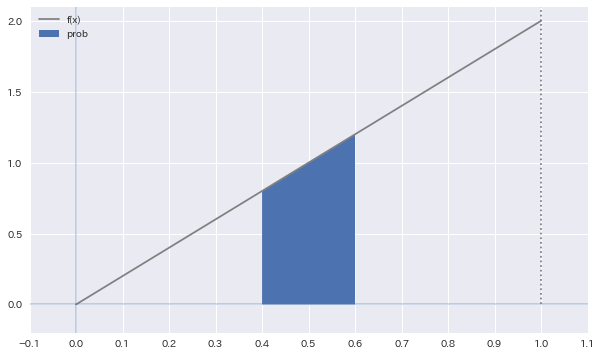

In [36]:
# 密度関数f(x)を図示する
# f(x)とx軸、2直線 x=0.4, x=0.6 に囲まれた領域を塗りつぶす
# いかさまルーレットが0.4から0.6の間の値をとる確率になる
xs = np.linspace(x_range[0], x_range[1], 100)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(xs, [f(x) for x in xs], label='f(x)', color='gray')
ax.hlines(0, -0.2, 1.2, alpha=0.3)
ax.vlines(0, -0.2, 2.2, alpha=0.3)
ax.vlines(xs.max(), 0, 2.2, linestyles=':', color='gray')

# 0.4~0.6のx座標
xs = np.linspace(0.4, 0.6, 100)

# xsの範囲でf(x)とx軸に囲まれた領域を塗りつぶす
ax.fill_between(xs, [f(x) for x in xs], label='prob')

ax.set_xticks(np.arange(-0.2, 1.3, 0.1))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.2, 2.1)
ax.legend()
plt.show()

- 囲まれた領域の面積は、台形の面積の公式から求めることができる
- ここでは積分で求める

$$
P(x_0 \leq X \leq x_1) = \int_{x_0}^{x_1} f(x)dx
$$

&nbsp;

$$
f(x) = 
\begin{cases}
\begin{align*}
2x ~~ &(0 \leq x \leq 1)
\\
0 ~~~~ &(otherwise)
\end{align*}
\end{cases}
$$

$$
P(0.4 \leq X \leq 0.6) = \int_{0.4}^{0.6} 2x~dx
$$

In [37]:
# integrate.quad()関数を使って求める
# quad()関数の返り値は、積分値と推定誤差
# 第1引数が被積分関数、第2引数と第3引数が積分区間
integrate.quad(f, 0.4, 0.6)

(0.200, 0.000)

#### 確率の性質

連続確率変数では、確率の性質として次の2つの式を満たす必要がある。

$$
\begin{align*}
f(x) &\geq 0
\\
\int_{-\infty}^{\infty} f(x)dx &= 1
\end{align*}
$$

In [39]:
# 確率の性質、1つ目の式の確認
# f(x)が常に0以上の値をとるという性質
# 関数の最小値を求める関数
# scipy.optimize.minimize_scalar()関数
from scipy.optimize import minimize_scalar

res = minimize_scalar(f)
# 関数の最小値はfunというインスタンス変数にある
res.fun

0

In [41]:
# 確率の性質、2つ目の式の確認
# f(x)を「-∞ から ∞」の区間で積分した結果が「1」
# 三角形も面積が「1」になることど同義
# 無限大は、np.infで表現できる
integrate.quad(f, -np.inf, np.inf)[0]

1.000

#### 累積分布関数（cumulative distribution function, CDF）、分布関数

確率変数$X$が$x$以下になるときの確率を返す関数を$F(x)$と表す

$$
F(x) = P(X \leq x) = \int_{-\infty}^{x} f(x)dx
$$

In [42]:
# いかさまルーレットの分布関数の実装
def F(x):
    """いかさまルーレットの分布関数"""
    return integrate.quad(f, -np.inf, x)[0]

- 分布関数でも確率を求めることができる
- ルーレットが0.4から0.6の間をとる確率

$$
P(0.4 \geq X \geq 0.6) = F(0.6) - F(0.4)
$$

In [43]:
F(0.6) - F(0.4)

0.200

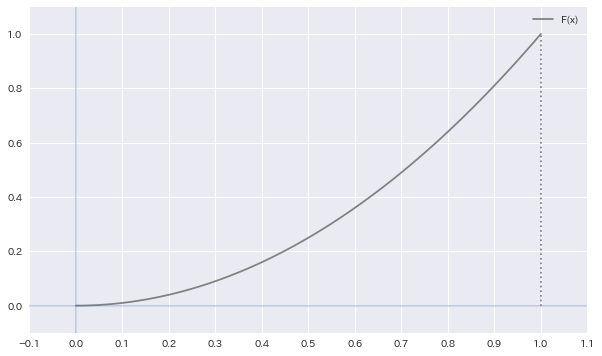

In [44]:
# いかさまルーレットの分布関数を図示する
# 単調増加関数（xが増えたときにyが減少することがない関数）になる
xs = np.linspace(x_range[0], x_range[1], 100)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.plot(xs, [F(x) for x in xs], label="F(x)", color="gray")
ax.hlines(0, -0.1, 1.1, alpha=0.3)
ax.vlines(0, -0.1, 1.1, alpha=0.3)
ax.vlines(xs.max(), 0, 1, linestyles=":", color="gray")

ax.set_xticks(np.arange(-0.1, 1.2, 0.1))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
ax.legend()

plt.show()

#### 確率変数の変換

- ルーレットの出た値に2をかけて3を足した$2X+3$を使い、これを$Y$とすると、
- $x = (y - 3)/2$
- $Y$もまた連続型の確率変数になっている。


確率変数$Y$の密度関数を$g(y)$とすると、

$$
g(y) = 
\begin{cases}
\begin{align*}
2x ~~ &(0 \leq x \leq 1)
\\
0 ~~~~ &(otherwise)
\end{align*}
\end{cases}
$$